<a href="https://colab.research.google.com/github/kbpotts1/Trisomy_NeuralNetwork/blob/master/K_Potts_Thinkful_Final_Capstone_Project_update17Mar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
import keras

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.optimizers import RMSprop
from keras import regularizers
from keras.layers import Conv1D, MaxPooling1D, Flatten


In [52]:
from google.colab import files

upload = files.upload()



Saving Data_Cortex_Nuclear .csv to Data_Cortex_Nuclear  (1).csv


In [0]:
df = pd.read_csv('Data_Cortex_Nuclear .csv')

In [0]:
#Impute missing protein expression values with a random value chosen from a normal distribution centered on the protein's mean
#expression value

for c in range(1, (len(df.columns.values))-4):
    df.iloc[:, c].fillna(np.random.normal(np.mean(df.iloc[:, c]), np.std(df.iloc[:, c])), inplace = True)

In [0]:
#Change outcome variables to numeric

df.Genotype.replace({'Control': 0, 'Ts65Dn': 1}, inplace = True)
df.Treatment.replace({'Memantine': 1, 'Saline': 0}, inplace = True)
df.Behavior.replace({'C/S': 0, 'S/C': 1}, inplace = True)
df['class'].replace({'c-CS-m': 0, 'c-SC-m': 1, 'c-CS-s': 2, 'c-SC-s': 3, 't-CS-m': 4, 't-SC-m': 5, 't-CS-s': 6, 't-SC-s': 7}, inplace = True)

In [56]:
df = df.drop(columns = ['MouseID'], axis = 1)
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,1,0,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,1,0,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,1,0,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,1,0,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,1,0,0
5,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,0,1,0,0
6,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,0,1,0,0
7,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,0,1,0,0
8,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,0,1,0,0
9,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,1.414329,...,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,0,1,0,0


In [0]:
#Create train and test sets for each outcome variable (genotype, learning state, and presence of memantine), as well as for the 'class' variable

xtrains = []
xtests = []
ytrains = []
ytests = []

for y in range(-4,0):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-4],df.iloc[:, y], test_size=0.40, random_state=42)
    y_train = keras.utils.to_categorical(y_train, len(np.unique(y_train)))
    y_test = keras.utils.to_categorical(y_test, len(np.unique(y_test)))
    xtrains.append(X_train)
    xtests.append(X_test)
    ytrains.append(y_train)
    ytests.append(y_test)

In [0]:
#Define a sequential neural network function

def gene_exp_network(X_train, y_train, X_test, y_test):
  
  models = []
  
  model = Sequential()
  model.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
  model.add(Dropout(0.3))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(10, activation = 'relu'))

  model.add(Dense(y_test.shape[1], activation = 'sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  
  models.append(model)

  history = model.fit(X_train, y_train,
                    batch_size= 30,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test))
  score = model.evaluate(X_test, y_test, verbose=0)
  loss = score[0]
  accuracy = score[1]
  return history, loss, accuracy

In [0]:
results = []

for i in range(4):
  network = gene_exp_network(xtrains[i], ytrains[i], xtests[i], ytests[i])
  results.append(network)

In [63]:
print('genotype loss: {}'.format(results[0][1]))
print('genotype accuracy: {}\n'.format(results[0][2]))

print('treatment loss: {}'.format(results[1][1]))
print('treatment accuracy: {}\n'.format(results[1][2]))

print('behavior loss: {}'.format(results[2][1]))
print('behavior accuracy: {}\n'.format(results[2][2]))

print('class loss: {}'.format(results[3][1]))
print('class accuracy: {}'.format(results[3][2]))
      

genotype loss: 0.06948179668850368
genotype accuracy: 0.9837962962962963

treatment loss: 0.16044793029626211
treatment accuracy: 0.9652777777777778

behavior loss: 6.357005070269763e-05
behavior accuracy: 1.0

class loss: 0.19244380626413557
class accuracy: 0.9137731481481481


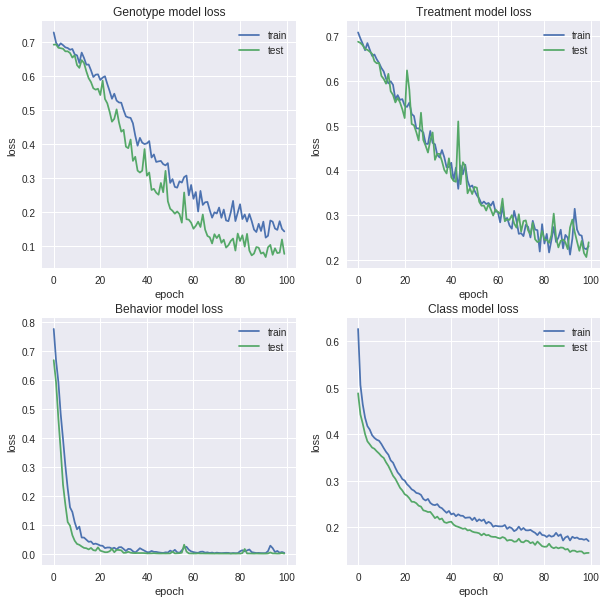

In [0]:
#Plot loss functions vs. epoch

plt.figure(figsize = (10,10))


#Genotype results

plt.subplot(2,2,1)
plt.plot(results[0][0].history['loss'])
plt.plot(results[0][0].history['val_loss'])
plt.title('Genotype model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

#Treatment results

plt.subplot(2,2,2)
plt.plot(results[1][0].history['loss'])
plt.plot(results[1][0].history['val_loss'])
plt.title('Treatment model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

#Behavior results

plt.subplot(2,2,3)
plt.plot(results[2][0].history['loss'])
plt.plot(results[2][0].history['val_loss'])
plt.title('Behavior model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

#Class results

plt.subplot(2,2,4)
plt.plot(results[3][0].history['loss'])
plt.plot(results[3][0].history['val_loss'])
plt.title('Class model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])


plt.show()


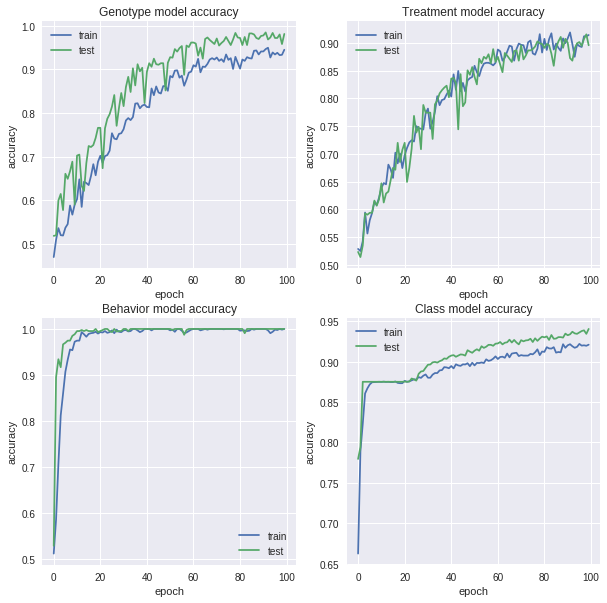

In [0]:
plt.figure(figsize = (10,10))

#Genotype
plt.subplot(2,2,1)
plt.plot(results[0][0].history['acc'])
plt.plot(results[0][0].history['val_acc'])
plt.title('Genotype model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

#Treatment
plt.subplot(2,2,2)
plt.plot(results[1][0].history['acc'])
plt.plot(results[1][0].history['val_acc'])
plt.title('Treatment model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

#Behavior
plt.subplot(2,2,3)
plt.plot(results[2][0].history['acc'])
plt.plot(results[2][0].history['val_acc'])
plt.title('Behavior model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])


#Class
plt.subplot(2,2,4)
plt.plot(results[3][0].history['acc'])
plt.plot(results[3][0].history['val_acc'])
plt.title('Class model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

plt.show()

In [0]:
#Do a sensitivity analysis to investigate why the "learning/behavior" accuracy comes out to be 1.0 - is the model simply overfitting to one particular gene?

hist = []
losses = []
acc = []

for i in range(X_train.shape[1]):
  x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, i],df['Behavior'], test_size=0.40, random_state=42)
  model = Sequential()
  model.add(Dense(64, activation = 'relu', input_shape = (1,)))
  model.add(Dropout(0.3))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(10, activation = 'relu'))

  model.add(Dense(1, activation = 'sigmoid'))

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    batch_size= 30,
                    epochs=100,
                    verbose=False,
                    validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  loss = score[0]
  accuracy = score[1]
  hist.append(history)
  losses.append(loss)
  acc.append(accuracy)
  

In [0]:
np.max(acc)

0.9814814814814815

In [0]:
rand = np.random.sample(1080)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(rand,df['Behavior'], test_size=0.40, random_state=42)
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (1080,)))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    batch_size= 30,
                    epochs=100,
                    verbose=False,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)


ValueError: ignored

In [0]:
score

[0.00010580458220593519, 1.0]

In [0]:
#Define an autoencoder function with up to 4 hidden layers     
      
def autoencoder_transform(X_train, X_test, n_hidden):
  
  input_dim = X_train.shape[1]
  input_layer = Input(shape=(input_dim, ))
  
  hidden_1 = Dense(input_dim, activation='relu')(input_layer)
  hidden_2 = Dense(input_dim, activation = 'relu')(hidden_1)
  hidden_3 = Dense(input_dim, activation = 'relu')(hidden_2)
  hidden_4 = Dense(input_dim, activation = 'relu')(hidden_3)
 
  if n_hidden == 1:    
    output_layer = output_layer = Dense(input_dim, activation = 'sigmoid')(hidden_1)
  elif n_hidden == 2:
    output_layer = Dense(input_dim, activation = 'sigmoid')(hidden_2)
  elif n_hidden == 3:
    output_layer = Dense(input_dim, activation = 'sigmoid')(hidden_3)
  elif n_hidden == 4:
    output_layer = Dense(input_dim, activation = 'sigmoid')(hidden_4)
      
  autoencoder = Model(inputs=input_layer, outputs=output_layer)
    
  autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
      
  
  history = autoencoder.fit(X_train, X_train, validation_data = (X_test, X_test), epochs = 100).history
  transformed = autoencoder.predict(X_test)
  
  return history, transformed


In [0]:
#Autoencode the X_test data from the gene expression dataset using an autoencoder with 4 hidden layers (a 'deep' neural network)
#and another with just one hidden layer (a 'shallow' network)

xtrains = []
xtests = []
ytrains = []
ytests = []

for y in range(-4,0):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:-4],df.iloc[:, y], test_size=0.40, random_state=42)
    xtrains.append(X_train)
    xtests.append(X_test)
    ytrains.append(y_train)
    ytests.append(y_test)
    
history_deep, transformed_deep = autoencoder_transform(xtrains[0], xtests[0], n_hidden = 4)
history_shallow, transformed_shallow = autoencoder_transform(xtrains[0], xtests[0], n_hidden = 1)  

In [0]:
#Look to see how much was lost in autoencoding the data


plt.plot(history_deep['loss'])
plt.plot(history_deep['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [0]:
#Run the autoencoded X_test values through the same ridge classifier I previously used to predict genotype, drug treatment, learning, and class
#(combination of all three binary variables)

from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

deep_autoencoder_accuracy = []
shallow_autoencoder_accuracy = []

for i in range(0,4):
  rc = RidgeClassifier(alpha = 5)
  rc.fit(transformed_deep,ytests[i])
  deep_autoencoder_accuracy.append(accuracy_score(ytests[i], rc.predict(transformed_deep)))
  rc.fit(transformed_shallow,ytests[i])
  shallow_autoencoder_accuracy.append(accuracy_score(ytests[i], rc.predict(transformed_deep)))

In [0]:
#How well does the autoencoded data predict 1) genotype, 2) treatment type (memantine vs. saline), 3) learning condition, 4) class
#('class' is the combination of the other three variables)

print('Deep autoencoder: \n Genotype: {}, Treatment: {}, Learning: {}, Class: {}'.format(deep_autoencoder_accuracy[0], deep_autoencoder_accuracy[1], deep_autoencoder_accuracy[2],deep_autoencoder_accuracy[3]))

print('Shallow autoencoder: \n Genotype: {}, Treatment: {}, Learning: {}, Class: {}'.format(shallow_autoencoder_accuracy[0], shallow_autoencoder_accuracy[1], shallow_autoencoder_accuracy[2],shallow_autoencoder_accuracy[3])) 